⚠️you should do train-test split before EDA. Test set should be entirely new and raw.


# ***Table of Contents***

- <b>[Section 1 Import Libraries and Dataset Overview](#1)</b>
- <b>[Section 2 EDA](#2)</b>
- <b>[Section 3 Feature Engineering](#3)</b>
- <b>[Section 4 Machine Learning Models](#4)</b>


## ***1. Import Libraries and Dataset Overview*** <a class="lanru" id="1"></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score


In [2]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [3]:
df.shape

(80000, 89)

## ***2. EDA***  <a class="lanru" id="2"></a>

Provide EDA (The distribution of Y by X) for the following variables. Write down the business insights for the variables. EDA is about the relationship between X and Y. So you can say something like "when X is high or low, Y is high or low". Reference the variable dictionary to give the business content. If you do the EDAs in a for loop, it will be very manageable.  

AP001, AP003, AP008
CR009, CR015, CR019
PA022, PA023, PA029
TD001, TD005, TD006, TD009, TD010, TD014

***Application***
- AP001: Yr_AGE
- AP003: CODE_EDUCATION
- AP008: FLAG_IP_CITY_NOT_APPL_CITY

***Credit Bureau***
- CR009: AMT_LOAN_TOTAL
- CR015: MONTH_CREDIT_CARD_MOB_MAX
- CR019: SCORE_SINGLE_DEBIT_CARD_LIMIT

***Call Detail***
- PA022: DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL
- PA023: DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL
- PA029: AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS

***Credit Center***
- TD001: TD_CNT_QUERY_LAST_7Day_P2P
- TD005: TD_CNT_QUERY_LAST_1MON_P2P
- TD006: TD_CNT_QUERY_LAST_1MON_SMALL_LOAN
- TD009: TD_CNT_QUERY_LAST_3MON_P2P
- TD010: TD_CNT_QUERY_LAST_3MON_SMALL_LOAN
- TD014: TD_CNT_QUERY_LAST_6MON_SMALL_LOAN

***EDA in a for loop***

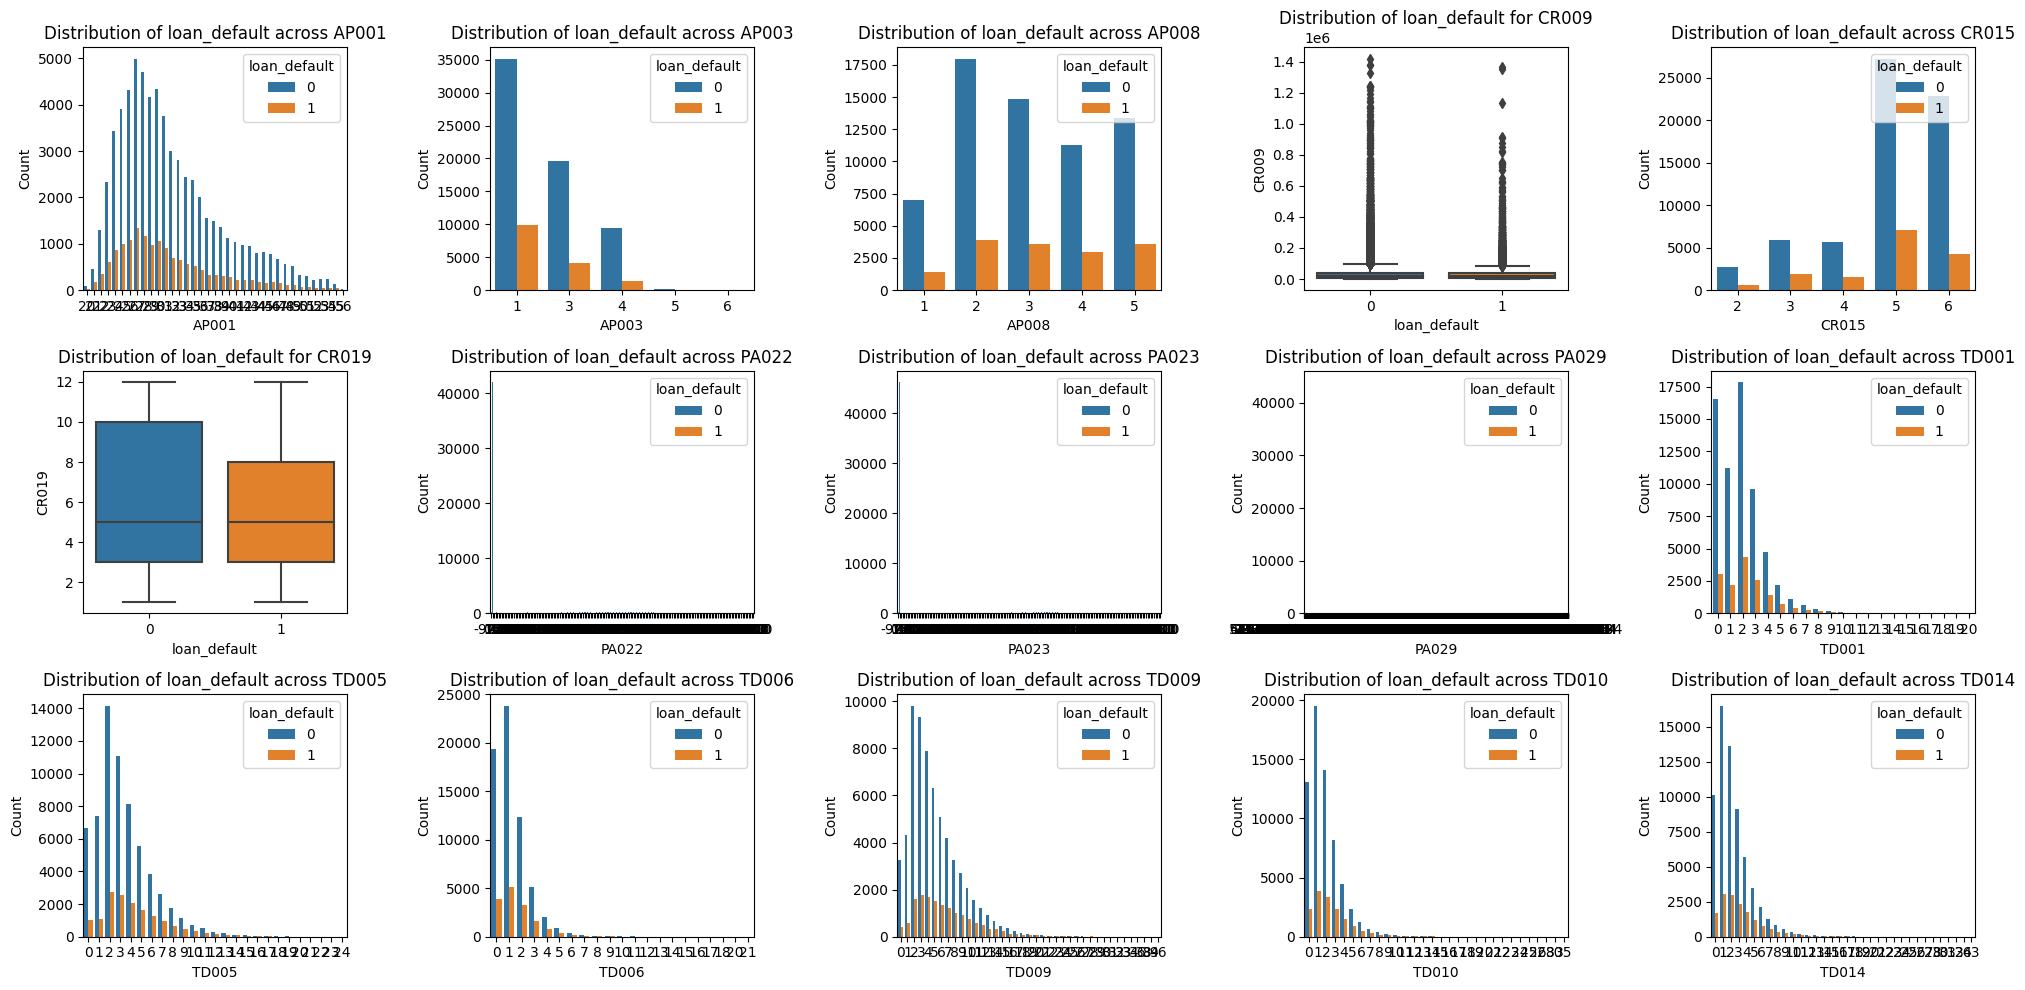

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the variables for graph generation
variables = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 5
num_plots = num_rows * num_cols

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,10))

# Loop through each variable and generate the graph
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Distribution of loan_default for categorical variables
    if var in ['AP001', 'AP003', 'AP008', 'CR015', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']:
        sns.countplot(data=df, x=var, hue='loan_default', ax=ax)
        ax.set_xlabel(var)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of loan_default across {var}')
        ax.legend(title='loan_default', loc='upper right')

    # Distribution of loan_default for numerical variables
    elif var in ['CR009', 'CR019']:
        sns.boxplot(data=df, x='loan_default', y=var, ax=ax)
        ax.set_xlabel('loan_default')
        ax.set_ylabel(var)
        ax.set_title(f'Distribution of loan_default for {var}')

# Remove empty subplots if the number of variables is less than the number of subplots
if len(variables) < num_plots:
    for i in range(len(variables), num_plots):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjust the layout to prevent overlapping of labels and titles
plt.show()  # Display the plot


***Summary:***

1. ***AP001: Yr_AGE :***The highest default rate is observed in the age group between 25 and 35 years, while borrowers lower than 35 years and above 45 years have a relatively lower default rate.

2. ***AP003: CODE_EDUCATION:***The graph reveals that borrowers with a higher level of education have a lower default rate compared to those with lower levels of education.

3. ***AP008: FLAG_IP_CITY_NOT_APPL_CITY*** The loan default rates show that borrowers who live in the same city where the IP address is registered have a slightly lower default rate compared to those who live in a different city.

4. ***CR009: AMT_LOAN_TOTAL*** Higher loan amounts are associated with a slightly higher default rate.Borrowers with loan amounts towards the upper quartile of the distribution tend to have a higher likelihood of defaulting.

5. ***CR015: MONTH_CREDIT_CARD_MOB_MAX*** Borrowers with higher maximum credit card months have a relatively lower default rate.

6. ***CR019: SCORE_SINGLE_DEBIT_CARD_LIMIT*** Borrowers with higher scores have a lower default rate, suggesting that creditworthiness, as reflected by the score, plays a role in loan default behavior.

10. ***TD001: TD_CNT_QUERY_LAST_7Day_P2P*** 
11. ***TD005: TD_CNT_QUERY_LAST_1MON_P2P***
12. ***TD006: TD_CNT_QUERY_LAST_1MON_SMALL_LOAN***
13. ***TD009: TD_CNT_QUERY_LAST_3MON_P2P***
14. ***TD010: TD_CNT_QUERY_LAST_3MON_SMALL_LOAN***
15. ***TD014: TD_CNT_QUERY_LAST_6MON_SMALL_LOAN*** 
All the above features show that lower count of queries result in higher loan default rate.

## ***3. Feature Engineering***  <a class="lanru" id="3"></a>

***Weight of evidence (WOE) is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant can repay the loan).***

***The WOE value is the odd ratio between the “good” and “bad” percentages.I'll perform WOE for PA022,PA023,PA029***

In [5]:
def WOE(var):
    df[var] = df[var].fillna('NoData')
    k = df[[var, 'loan_default']].groupby(var)['loan_default'].agg(['count', 'sum']).reset_index()
    k.columns = [var, 'Count', 'Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum() * 100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum() * 100).round(2)
    k[var + '_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var + '_WOE')
    return k

k1 = WOE('PA022')
k1

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA022,Count,Good,Bad,Good %,Bad %,PA022_WOE
125,123.0,4,0,4,0.00,0.01,-inf
123,121.0,14,2,12,0.01,0.02,-0.69
0,-99.0,1534,230,1304,1.49,2.02,-0.30
53,51.0,216,34,182,0.22,0.28,-0.24
116,114.0,115,19,96,0.12,0.15,-0.22
...,...,...,...,...,...,...,...
165,430.0,1,0,1,0.00,0.00,NaN
167,437.0,1,0,1,0.00,0.00,NaN
168,440.0,1,0,1,0.00,0.00,NaN
169,441.0,1,0,1,0.00,0.00,NaN


In [6]:
k1.isnull().sum()

PA022         0
Count         0
Good          0
Bad           0
Good %        0
Bad %         0
PA022_WOE    35
dtype: int64

In [7]:
k2 = WOE('PA023')
k2

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA023,Count,Good,Bad,Good %,Bad %,PA023_WOE
124,122.0,4,0,4,0.00,0.01,-inf
123,121.0,13,2,11,0.01,0.02,-0.69
116,114.0,95,14,81,0.09,0.13,-0.37
19,17.0,125,18,107,0.12,0.17,-0.35
74,72.0,188,28,160,0.18,0.25,-0.33
...,...,...,...,...,...,...,...
159,426.0,1,0,1,0.00,0.00,NaN
161,430.0,1,0,1,0.00,0.00,NaN
163,440.0,1,0,1,0.00,0.00,NaN
164,441.0,1,0,1,0.00,0.00,NaN


In [8]:
k2.isnull().sum()

PA023         0
Count         0
Good          0
Bad           0
Good %        0
Bad %         0
PA023_WOE    34
dtype: int64

In [9]:
k3 = WOE('PA029')
k3

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA029,Count,Good,Bad,Good %,Bad %,PA029_WOE
3476,236.0,8,0,8,0.0,0.01,-inf
152,15.666667,5,0,5,0.0,0.01,-inf
2331,103.666667,4,0,4,0.0,0.01,-inf
582,35.4,5,0,5,0.0,0.01,-inf
594,35.75,7,0,7,0.0,0.01,-inf
...,...,...,...,...,...,...,...
4114,1614.0,1,0,1,0.0,0.00,NaN
4115,1757.0,1,0,1,0.0,0.00,NaN
4116,1767.75,1,0,1,0.0,0.00,NaN
4117,1919.0,1,0,1,0.0,0.00,NaN


In [10]:
k3.isnull().sum()

PA029           0
Count           0
Good            0
Bad             0
Good %          0
Bad %           0
PA029_WOE    2128
dtype: int64

 ***Merge WOE values back to the original DataFrame***

In [11]:
df2 = df.merge(k1[['PA022', 'PA022_WOE']], on='PA022', how='left')
df2 = df.merge(k2[['PA023', 'PA023_WOE']], on='PA023', how='left')
df2 = df.merge(k3[['PA029', 'PA029_WOE']], on='PA029', how='left')

***New Dataset Overview***

In [12]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007,PA029_WOE
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,-0.13
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB,-0.13
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB,-0.13
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO,-0.13
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB,-0.30


## ***4. Machine Learning***  <a class="lanru" id="4"></a>

### ***4.1.1. Decision Tree: df***

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Convert 'PA022' column to string type
df['PA022'] = df['PA022'].astype(str)
df['PA023'] = df['PA023'].astype(str)
df['PA029'] = df['PA029'].astype(str)

df['PA022'] = le.fit_transform(df['PA022'])
df['PA023'] = le.fit_transform(df['PA023'])
df['PA029'] = le.fit_transform(df['PA029'])

# Specify the updated features with the encoded variable
features_encoded = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
target = 'loan_default'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_encoded], df[target], test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the loan_default for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6874375


***ROC***

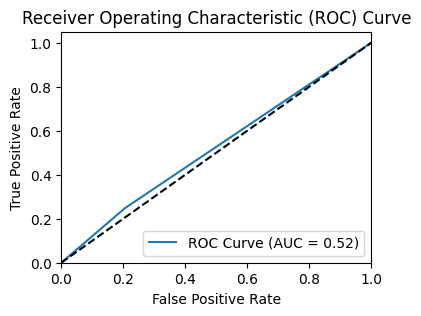

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### ***4.1.2 Decision Tree: df2***

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Convert 'PA022' column to string type
df2['PA022'] = df2['PA022'].astype(str)
df2['PA023'] = df2['PA023'].astype(str)
df2['PA029'] = df2['PA029'].astype(str)

df2['PA022'] = le.fit_transform(df2['PA022'])
df2['PA023'] = le.fit_transform(df2['PA023'])
df2['PA029'] = le.fit_transform(df2['PA029'])

# Specify the updated features with the encoded variable
features_encoded = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
target = 'loan_default'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[features_encoded], df2[target], test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the loan_default for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6919375


***ROC***

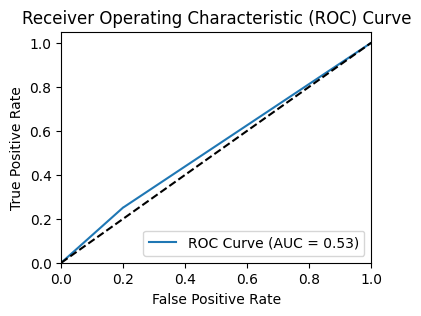

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

***Summary:***
ROC Value increases for decision tree model.

### ***4.2.1 Logistic Regression: df***

In [21]:
# Convert 'PA022' column to string type
df['PA022'] = df['PA022'].astype(str)
df['PA023'] = df['PA023'].astype(str)
df['PA029'] = df['PA029'].astype(str)

df['PA022'] = le.fit_transform(df['PA022'])
df['PA023'] = le.fit_transform(df['PA023'])
df['PA029'] = le.fit_transform(df['PA029'])

# Specify the updated features with the encoded variable
features_encoded = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
target = 'loan_default'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_encoded], df[target], test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the loan_default probabilities for the test data
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
auc_score

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5715389413871904

***ROC***

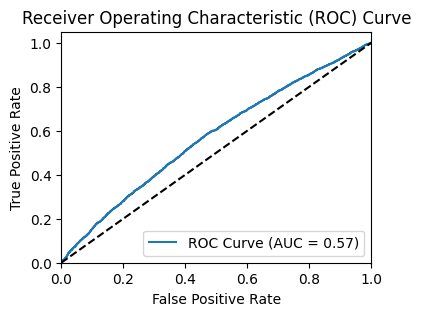

In [22]:
# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### ***4.2.2 Logistic Regression: df2***

In [23]:
# Convert 'PA022' column to string type
df2['PA022'] = df2['PA022'].astype(str)
df2['PA023'] = df2['PA023'].astype(str)
df2['PA029'] = df2['PA029'].astype(str)

df2['PA022'] = le.fit_transform(df2['PA022'])
df2['PA023'] = le.fit_transform(df2['PA023'])
df2['PA029'] = le.fit_transform(df2['PA029'])

# Specify the updated features with the encoded variable
features_encoded = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
target = 'loan_default'

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the loan_default probabilities for the test data
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
auc_score

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5715389413871904

***ROC***

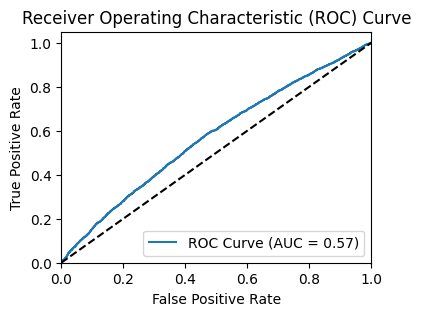

In [24]:
# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()